In [1]:
#dataset - http://vlm1.uta.edu/~athitsos/projects/drowsiness/
import pandas as pd
df = pd.read_csv('totalwithmaininfo.csv',sep=',');

In [2]:
df=df.drop(df.columns[0], axis=1)

In [3]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [4]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [5]:
x_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [6]:
x_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [8]:
x_test.shape

(2400, 8)

In [10]:
x_train.shape

(8160, 8)

In [11]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(1632,5,8)
x_shaped_test  = np.array(x_test).reshape(480,5,8)

In [12]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_shaped_train  = []
for i in range(0, len(y_train), 5):
  y_shaped_train.append([y_train[i]])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 5):
  y_shaped_test.append([y_test[i]])
print(len(y_shaped_test))

1632
480


In [13]:
x_shaped_train.shape

(1632, 5, 8)

In [14]:
x_shaped_test.shape

(480, 5, 8)

In [15]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(1632, 1)

In [16]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(480, 1)

In [20]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(5, 4,),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='tanh')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))#Output Layer
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(x_shaped_train, y_shaped_train, validation_data = (x_shaped_test,y_shaped_test), epochs=50, batch_size=  10)
model.predict(x_shaped_test)

Epoch 1/50
164/164 [==============================] - 14s 67ms/step - loss: 3.3816 - accuracy: 0.5092 - val_loss: 1.1066 - val_accuracy: 0.5000
Epoch 2/50
164/164 [==============================] - 11s 65ms/step - loss: 2.3072 - accuracy: 0.4982 - val_loss: 0.8838 - val_accuracy: 0.5000
Epoch 3/50
164/164 [==============================] - 11s 64ms/step - loss: 2.0045 - accuracy: 0.5165 - val_loss: 0.6808 - val_accuracy: 0.6500
Epoch 4/50
164/164 [==============================] - 11s 65ms/step - loss: 1.5740 - accuracy: 0.5104 - val_loss: 0.6900 - val_accuracy: 0.4875
Epoch 5/50
164/164 [==============================] - 11s 66ms/step - loss: 1.4026 - accuracy: 0.4975 - val_loss: 0.6801 - val_accuracy: 0.6333
Epoch 6/50
164/164 [==============================] - 11s 64ms/step - loss: 1.4425 - accuracy: 0.5184 - val_loss: 0.6862 - val_accuracy: 0.6500
Epoch 7/50
164/164 [==============================] - 11s 66ms/step - loss: 1.1320 - accuracy: 0.5282 - val_loss: 0.6785 - val_accuracy:

array([[0.2462496 ],
       [0.21143325],
       [0.23046061],
       [0.27725834],
       [0.36879414],
       [0.25811353],
       [0.36316457],
       [0.3463202 ],
       [0.61630857],
       [0.56219566],
       [0.45524395],
       [0.43676135],
       [0.51435196],
       [0.5237711 ],
       [0.5607973 ],
       [0.5583102 ],
       [0.51720446],
       [0.5970894 ],
       [0.5488117 ],
       [0.5789451 ],
       [0.39109942],
       [0.76211077],
       [0.7606531 ],
       [0.7145791 ],
       [0.72804457],
       [0.661044  ],
       [0.6736114 ],
       [0.7146577 ],
       [0.72283113],
       [0.63394135],
       [0.27765933],
       [0.56451917],
       [0.62066966],
       [0.40830028],
       [0.6736349 ],
       [0.55128366],
       [0.67004526],
       [0.5549128 ],
       [0.61169386],
       [0.6679934 ],
       [0.6564097 ],
       [0.6906048 ],
       [0.7268507 ],
       [0.7370087 ],
       [0.5967144 ],
       [0.7373912 ],
       [0.531644  ],
       [0.725

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict(x_shaped_test)
y_score_10 = model.predict(x_shaped_test)
pred_rnn = np.round(pred_rnn) # Round predictions to get binary class labels
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = f1_score(y_shaped_test, np.array(pred_rnn))
roc_10 = roc_auc_score(y_shaped_test, y_score_10[:, ]) # Use probability of positive class for ROC AUC
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

15/15 [==============================] - 0s 23ms/step
[0.6458333333333334, 0.6730769230769231, 0.655]
[[135 105]
 [ 65 175]]


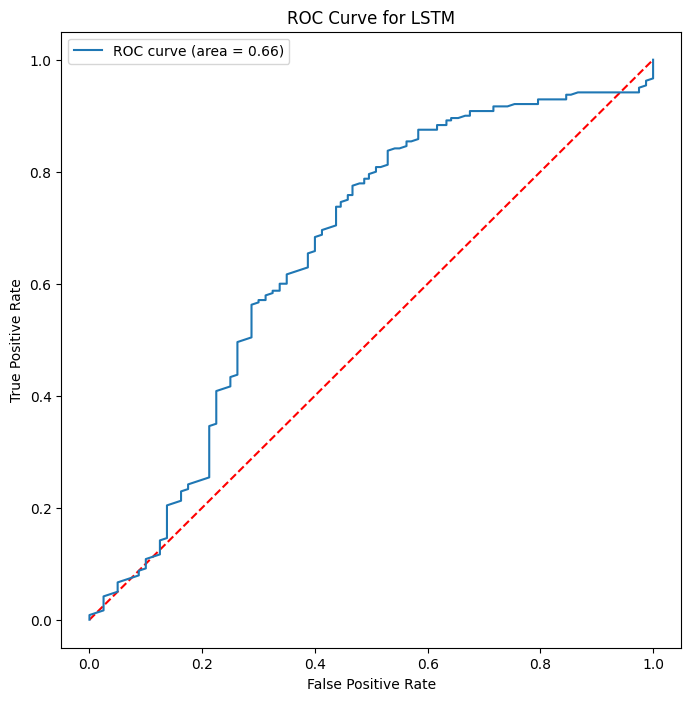

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

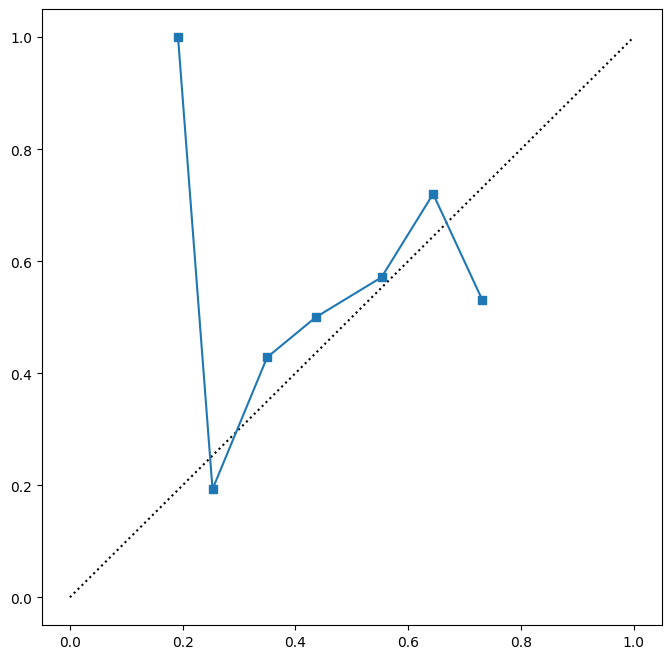

In [34]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')